# Project: Heart Disease Classification

By: odubajo abdul qoyyum


This notebook covers:
- Loading the data
- Data  assessing
- Feature Engineering and Outlier detection
- Simple EDA
- Feature scaling
- Creating two  models

### Importing libraries

In [16]:
# dataframe and plotting
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# machine learning
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
import imblearn.over_sampling as RandomOverSampler

#preprocessing module
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split ,StratifiedKFold,GridSearchCV

##feature Scaling
from sklearn.preprocessing import StandardScaler

## feature selection
from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings('ignore')

###  Load the dataset

In [3]:
# Load files into a pandas dataframe
df = pd.read_csv('brain_stroke.csv')
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


###  Data Assessing and cleaning

In [4]:
# inspect data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4981 non-null   object 
 1   age                4981 non-null   float64
 2   hypertension       4981 non-null   int64  
 3   heart_disease      4981 non-null   int64  
 4   ever_married       4981 non-null   object 
 5   work_type          4981 non-null   object 
 6   Residence_type     4981 non-null   object 
 7   avg_glucose_level  4981 non-null   float64
 8   bmi                4981 non-null   float64
 9   smoking_status     4981 non-null   object 
 10  stroke             4981 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 428.2+ KB


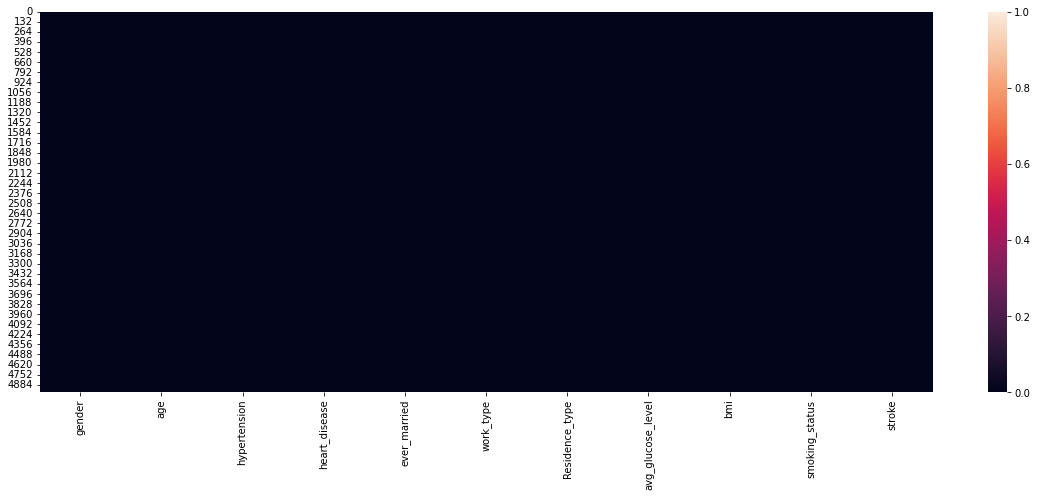

In [5]:
#check missing values
fig, ax = plt.subplots(figsize = (20,7))
ax = sns.heatmap(df.isnull(), vmin=0, vmax = 1)

##  Feature Engineering 

In [6]:
#Encoding categorical Data
df['gender'].replace( { 'Male':1, 'Female':0} , inplace=True)
df['ever_married'].replace( { 'Yes':1, 'No':0} , inplace=True)
df['Residence_type'].replace( { 'Rural':0, 'Urban':1} , inplace=True)
df['work_type'].replace( { 'Private':4, 'Self-employed':1, 'children':0, 'Govt_job':3} , inplace=True)
df['smoking_status'].replace( { 'never smoked':1, 'formerly smoked':2, 'smokes':3, 'Unknown':4} , inplace=True)

##  Outlier detection

In [7]:
df.describe()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000
mean,0.416382,43.419859,0.096165,0.055210,0.658502,2.846015,0.508332,105.943562,28.498173,2.389078,0.049789
std,0.493008,22.662755,0.294848,0.228412,0.474260,1.553264,0.499981,45.075373,6.790464,1.256307,0.217531
min,0.000000,0.080000,0.000000,0.000000,0.000000,0.000000,0.000000,55.120000,14.000000,1.000000,0.000000
25%,0.000000,25.000000,0.000000,0.000000,0.000000,1.000000,0.000000,77.230000,23.700000,1.000000,0.000000
50%,0.000000,45.000000,0.000000,0.000000,1.000000,4.000000,1.000000,91.850000,28.100000,2.000000,0.000000
75%,1.000000,61.000000,0.000000,0.000000,1.000000,4.000000,1.000000,113.860000,32.600000,4.000000,0.000000
max,1.000000,82.000000,1.000000,1.000000,1.000000,4.000000,1.000000,271.740000,48.900000,4.000000,1.000000


- there are outliers in some of the columns

## Outlier removal

In [8]:
# creating a function to remove values greater than two standard deviations from the mean

def remove_outliers(data, column):
    mean=data[column].std()
    std=data[column].mean()

    #generating the treshold
    treshold=mean+std*2

    #getting the data below the treshold

    data=data[data[column] <=treshold]

    return data

In [9]:
#removing the outiers

df = remove_outliers(df, 'bmi')
df = remove_outliers(df, 'avg_glucose_level')

## Exploratory Data Analysis

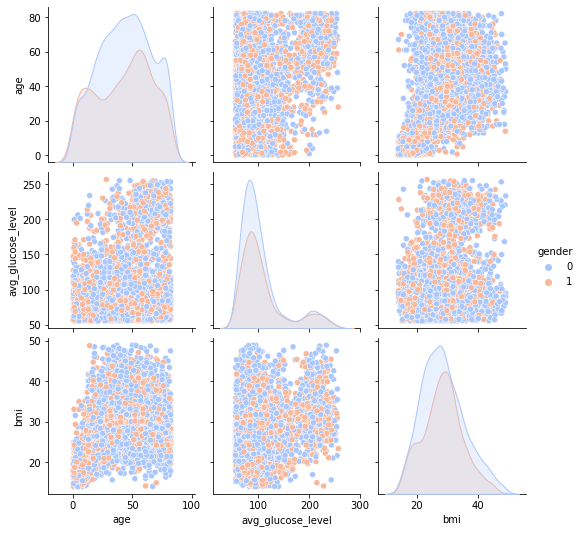

In [10]:
sns.pairplot(data = df[['age','avg_glucose_level','bmi','gender']], hue = 'gender',palette='coolwarm')

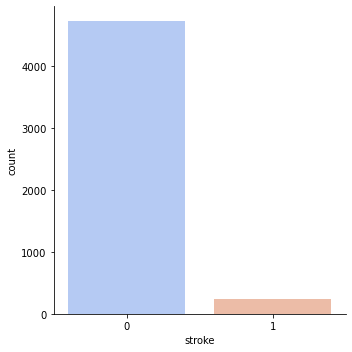

In [11]:
# Explore Target distribution 
sns.catplot(x="stroke", kind="count", data=df,palette='coolwarm')

- the target column is not balanced

## Data preprocessing  and model building

In [12]:
y = df.stroke
x = df.drop('stroke', axis=1)

In [13]:
from imblearn.over_sampling import RandomOverSampler

oversample = RandomOverSampler(sampling_strategy='minority')

x, y = oversample.fit_resample(x, y)

In [14]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=101)

### pipeline, handling missing values, and feature scaling 

In [18]:
steps=[("imputation_mean",SimpleImputer(missing_values=np.nan,strategy="mean")),
    ("scaling",StandardScaler()),
      ("DTC",DecisionTreeClassifier())]

In [23]:
pipe=Pipeline(steps)

## model training and hyperparameter tuning

In [26]:
params ={}
params['DTC__max_depth']= [2,3, 5, 10, None,"auto"]
params['DTC__min_samples_split']= [5,6,7,8]
params['DTC__min_samples_leaf']= [5,6,7,8]

In [27]:
skf = StratifiedKFold(5, shuffle=True, random_state=1)

In [28]:
grid = GridSearchCV(pipe,params,refit=True,verbose=2,cv=skf)

In [29]:
grid.fit(x_train,y_train)

Fitting 5 folds for each of 96 candidates, totalling 480 fits
[CV] END DTC__max_depth=2, DTC__min_samples_leaf=5, DTC__min_samples_split=5; total time=   0.0s
[CV] END DTC__max_depth=2, DTC__min_samples_leaf=5, DTC__min_samples_split=5; total time=   0.0s
[CV] END DTC__max_depth=2, DTC__min_samples_leaf=5, DTC__min_samples_split=5; total time=   0.0s
[CV] END DTC__max_depth=2, DTC__min_samples_leaf=5, DTC__min_samples_split=5; total time=   0.0s
[CV] END DTC__max_depth=2, DTC__min_samples_leaf=5, DTC__min_samples_split=5; total time=   0.0s
[CV] END DTC__max_depth=2, DTC__min_samples_leaf=5, DTC__min_samples_split=6; total time=   0.0s
[CV] END DTC__max_depth=2, DTC__min_samples_leaf=5, DTC__min_samples_split=6; total time=   0.0s
[CV] END DTC__max_depth=2, DTC__min_samples_leaf=5, DTC__min_samples_split=6; total time=   0.0s
[CV] END DTC__max_depth=2, DTC__min_samples_leaf=5, DTC__min_samples_split=6; total time=   0.0s
[CV] END DTC__max_depth=2, DTC__min_samples_leaf=5, DTC__min_samp

[CV] END DTC__max_depth=3, DTC__min_samples_leaf=5, DTC__min_samples_split=6; total time=   0.0s
[CV] END DTC__max_depth=3, DTC__min_samples_leaf=5, DTC__min_samples_split=6; total time=   0.0s
[CV] END DTC__max_depth=3, DTC__min_samples_leaf=5, DTC__min_samples_split=6; total time=   0.0s
[CV] END DTC__max_depth=3, DTC__min_samples_leaf=5, DTC__min_samples_split=6; total time=   0.0s
[CV] END DTC__max_depth=3, DTC__min_samples_leaf=5, DTC__min_samples_split=7; total time=   0.0s
[CV] END DTC__max_depth=3, DTC__min_samples_leaf=5, DTC__min_samples_split=7; total time=   0.0s
[CV] END DTC__max_depth=3, DTC__min_samples_leaf=5, DTC__min_samples_split=7; total time=   0.0s
[CV] END DTC__max_depth=3, DTC__min_samples_leaf=5, DTC__min_samples_split=7; total time=   0.0s
[CV] END DTC__max_depth=3, DTC__min_samples_leaf=5, DTC__min_samples_split=7; total time=   0.0s
[CV] END DTC__max_depth=3, DTC__min_samples_leaf=5, DTC__min_samples_split=8; total time=   0.0s
[CV] END DTC__max_depth=3, DTC

[CV] END DTC__max_depth=5, DTC__min_samples_leaf=5, DTC__min_samples_split=7; total time=   0.0s
[CV] END DTC__max_depth=5, DTC__min_samples_leaf=5, DTC__min_samples_split=8; total time=   0.0s
[CV] END DTC__max_depth=5, DTC__min_samples_leaf=5, DTC__min_samples_split=8; total time=   0.0s
[CV] END DTC__max_depth=5, DTC__min_samples_leaf=5, DTC__min_samples_split=8; total time=   0.0s
[CV] END DTC__max_depth=5, DTC__min_samples_leaf=5, DTC__min_samples_split=8; total time=   0.0s
[CV] END DTC__max_depth=5, DTC__min_samples_leaf=5, DTC__min_samples_split=8; total time=   0.0s
[CV] END DTC__max_depth=5, DTC__min_samples_leaf=6, DTC__min_samples_split=5; total time=   0.0s
[CV] END DTC__max_depth=5, DTC__min_samples_leaf=6, DTC__min_samples_split=5; total time=   0.0s
[CV] END DTC__max_depth=5, DTC__min_samples_leaf=6, DTC__min_samples_split=5; total time=   0.0s
[CV] END DTC__max_depth=5, DTC__min_samples_leaf=6, DTC__min_samples_split=5; total time=   0.0s
[CV] END DTC__max_depth=5, DTC

[CV] END DTC__max_depth=10, DTC__min_samples_leaf=6, DTC__min_samples_split=5; total time=   0.0s
[CV] END DTC__max_depth=10, DTC__min_samples_leaf=6, DTC__min_samples_split=5; total time=   0.0s
[CV] END DTC__max_depth=10, DTC__min_samples_leaf=6, DTC__min_samples_split=5; total time=   0.0s
[CV] END DTC__max_depth=10, DTC__min_samples_leaf=6, DTC__min_samples_split=5; total time=   0.0s
[CV] END DTC__max_depth=10, DTC__min_samples_leaf=6, DTC__min_samples_split=5; total time=   0.0s
[CV] END DTC__max_depth=10, DTC__min_samples_leaf=6, DTC__min_samples_split=6; total time=   0.0s
[CV] END DTC__max_depth=10, DTC__min_samples_leaf=6, DTC__min_samples_split=6; total time=   0.0s
[CV] END DTC__max_depth=10, DTC__min_samples_leaf=6, DTC__min_samples_split=6; total time=   0.0s
[CV] END DTC__max_depth=10, DTC__min_samples_leaf=6, DTC__min_samples_split=6; total time=   0.0s
[CV] END DTC__max_depth=10, DTC__min_samples_leaf=6, DTC__min_samples_split=6; total time=   0.0s
[CV] END DTC__max_de

[CV] END DTC__max_depth=None, DTC__min_samples_leaf=6, DTC__min_samples_split=7; total time=   0.0s
[CV] END DTC__max_depth=None, DTC__min_samples_leaf=6, DTC__min_samples_split=7; total time=   0.0s
[CV] END DTC__max_depth=None, DTC__min_samples_leaf=6, DTC__min_samples_split=7; total time=   0.0s
[CV] END DTC__max_depth=None, DTC__min_samples_leaf=6, DTC__min_samples_split=7; total time=   0.0s
[CV] END DTC__max_depth=None, DTC__min_samples_leaf=6, DTC__min_samples_split=7; total time=   0.0s
[CV] END DTC__max_depth=None, DTC__min_samples_leaf=6, DTC__min_samples_split=8; total time=   0.0s
[CV] END DTC__max_depth=None, DTC__min_samples_leaf=6, DTC__min_samples_split=8; total time=   0.0s
[CV] END DTC__max_depth=None, DTC__min_samples_leaf=6, DTC__min_samples_split=8; total time=   0.0s
[CV] END DTC__max_depth=None, DTC__min_samples_leaf=6, DTC__min_samples_split=8; total time=   0.0s
[CV] END DTC__max_depth=None, DTC__min_samples_leaf=6, DTC__min_samples_split=8; total time=   0.0s


[CV] END DTC__max_depth=auto, DTC__min_samples_leaf=6, DTC__min_samples_split=8; total time=   0.0s
[CV] END DTC__max_depth=auto, DTC__min_samples_leaf=6, DTC__min_samples_split=8; total time=   0.0s
[CV] END DTC__max_depth=auto, DTC__min_samples_leaf=6, DTC__min_samples_split=8; total time=   0.0s
[CV] END DTC__max_depth=auto, DTC__min_samples_leaf=7, DTC__min_samples_split=5; total time=   0.0s
[CV] END DTC__max_depth=auto, DTC__min_samples_leaf=7, DTC__min_samples_split=5; total time=   0.0s
[CV] END DTC__max_depth=auto, DTC__min_samples_leaf=7, DTC__min_samples_split=5; total time=   0.0s
[CV] END DTC__max_depth=auto, DTC__min_samples_leaf=7, DTC__min_samples_split=5; total time=   0.0s
[CV] END DTC__max_depth=auto, DTC__min_samples_leaf=7, DTC__min_samples_split=5; total time=   0.0s
[CV] END DTC__max_depth=auto, DTC__min_samples_leaf=7, DTC__min_samples_split=6; total time=   0.0s
[CV] END DTC__max_depth=auto, DTC__min_samples_leaf=7, DTC__min_samples_split=6; total time=   0.0s


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=1, shuffle=True),
             estimator=Pipeline(steps=[('imputation_mean', SimpleImputer()),
                                       ('scaling', StandardScaler()),
                                       ('DTC', DecisionTreeClassifier())]),
             param_grid={'DTC__max_depth': [2, 3, 5, 10, None, 'auto'],
                         'DTC__min_samples_leaf': [5, 6, 7, 8],
                         'DTC__min_samples_split': [5, 6, 7, 8]},
             verbose=2)

In [31]:
DTC_pred=grid.predict(x_test)

## model evaluation

In [34]:
print(classification_report(y_test,DTC_pred))

              precision    recall  f1-score   support

           0       1.00      0.89      0.94       929
           1       0.90      1.00      0.95       962

    accuracy                           0.95      1891
   macro avg       0.95      0.95      0.95      1891
weighted avg       0.95      0.95      0.95      1891

